In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import data
train = pd.read_csv("MNIST/input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#import test data
test= pd.read_csv("MNIST/input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [6]:
X_train.shape

(42000, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

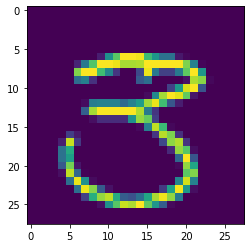

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
plt.imshow(X_train[7])
plt.show

In [8]:
x_train = tf.keras.utils.normalize(X_train, axis=1)
x_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation =tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation =tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation =tf.nn.softmax))

model.compile(optimizer ='adam',
             loss='sparse_categorical_crossentropy',
             metrics =['accuracy'])
model.fit(x_train,y_train,epochs=4)

Epoch 1/4
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2993 - accuracy: 0.9140
Epoch 2/4
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1193 - accuracy: 0.9639
Epoch 3/4
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0802 - accuracy: 0.9745
Epoch 4/4
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0572 - accuracy: 0.9816


In [13]:
#x_test = x_test.reshape(x_test.shape[0], 28, 28)
predictions = model.predict([x_test])

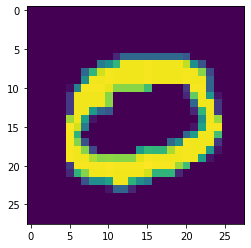

In [14]:
plt.imshow(x_test[1])

In [11]:
result=np.argmax(predictions,axis = 1)
result[1]

0

In [12]:
submission = pd.DataFrame({'ImageId':pd.Series(range(1, 28001)),'Label': result})
submission.to_csv('mnist_kaggle_submisison.csv', index=False)